In [3]:
%load_ext autoreload
%autoreload 2

from data_util import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
snr_per_bin = 15
file_id = './data_products/systematic_marginalized_velocity_dispersion_snr_per_bin_{}'.format(snr_per_bin)

binned_dispersion = np.loadtxt(file_id+'_mean.txt')
covariance = np.loadtxt(file_id+'_covariance.txt')

In [7]:
covariance.shape

(121, 121)

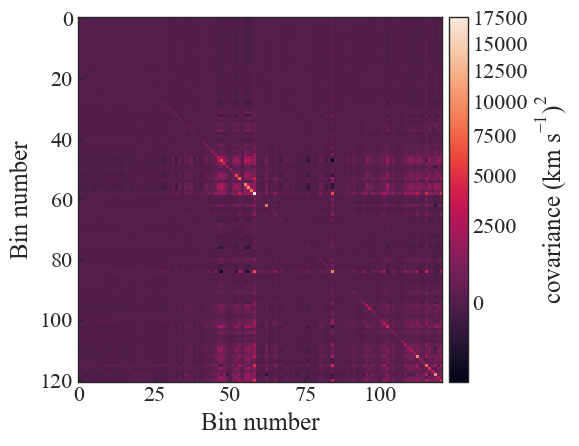

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import simple_norm
import paperfig as pf

pf.set_fontscale(2.)

norm = simple_norm(covariance, 'sqrt')

fig = plt.figure()
ax = fig.add_subplot(111)


im = ax.imshow((covariance), norm=norm) #, cmap='gist')
#plt.colorbar(cbar, label=r'(km/s)${}^2$')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad='2%')
cbar = fig.colorbar(im, cax=cax, label=r'covariance (km s$^{-1}$)$^{2}$')

ax.set_xlabel('Bin number')
ax.set_ylabel('Bin number')

fig.tight_layout()

# fig.savefig('/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/velocity_dispersion_covariance.pdf', 
#             bbox_inches='tight'
#            )

## Illustrations of function usages

### loading bin mapping

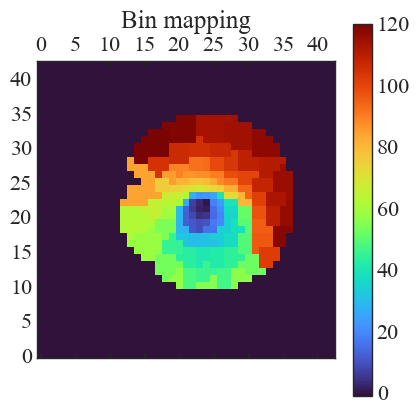

In [14]:
bin_mapping = load_bin_mapping(target_snr_per_bin=snr_per_bin, plot=True);


### loading extracted velocity dispersion and get $v_{\rm rms}$

In [18]:
get_kinematics_maps(binned_dispersion, bin_mapping).shape

(43, 43)

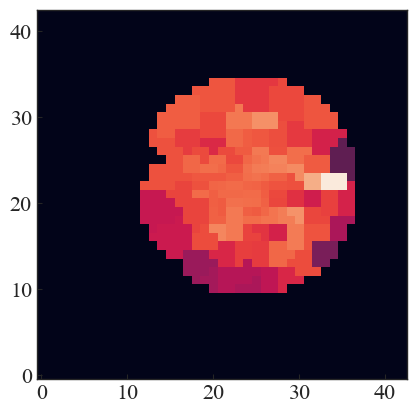

In [21]:
plt.imshow(get_kinematics_maps(binned_dispersion, bin_mapping), origin='lower')

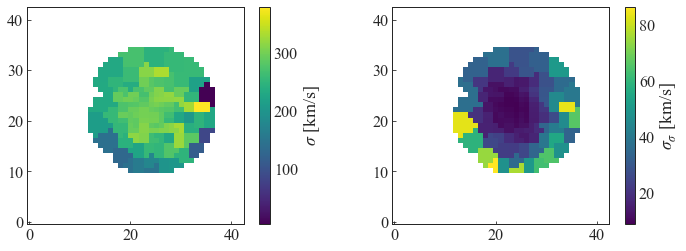

/Users/ajshajib/miniforge3/lib/python3.9/site-packages/plotbin/sauron_colormap.py:105: UserWarning: Trying to register the cmap 'sauron' which already exists.
  plt.register_cmap(cmap=sauron)
/Users/ajshajib/miniforge3/lib/python3.9/site-packages/plotbin/sauron_colormap.py:106: UserWarning: Trying to register the cmap 'sauron_r' which already exists.
  plt.register_cmap(cmap=sauron_r)


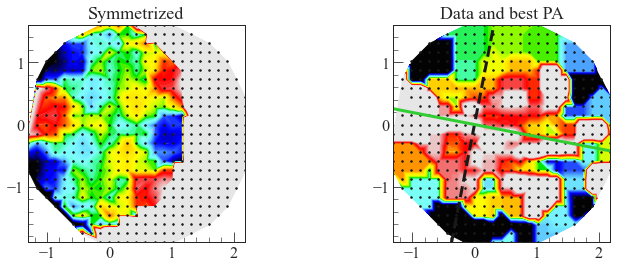

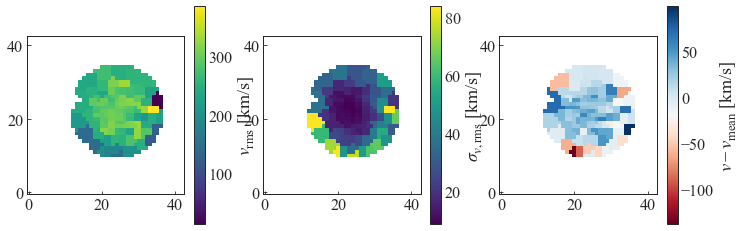

In [14]:
vd_name = 'wave_rng_2_deg_2_global_temp_2_quasar_sp_B_SN_15'

directory_measurements = "../kcwi_extractions/extracted_dispersions/"
object_name = "KCWI_RXJ1131_icubes_mosaic_0.1457"

VD_2d, dVD_2d, V_2d, dV_2d, fig = post_process.get_kinematics_maps(
                                directory_measurements, object_name+'_targetSN_15', 
                                radius_in_pixels=21,
                                vd_name=vd_name, 
                                vd_val=1000, plot=True)

v_rms, sigma_rms, fig = post_process.get_v_rms(directory_measurements, object_name+'_targetSN_15', 
                                          radius_in_pixels=21,
                                          vd_name=vd_name,
                                          vd_val=1000, 
                                          plot=True)
